**Лабораторная работа 2**

**Кубышкина Екатерина, вариант 11**

**Задача 2.6.2**

Локализовать корни уравнения f(x)=0. Найти их с точностью ε=1е-5 и ε=1е-12, используя метод Ньютона и метод ложного положения. 
Сравнить скорость сходимости методов (по числу итераций) для каждого значения ε.


$f(x) = \sqrt{2-x^2}-e^x$

**Метод Ньютона**

Пусть дано уравнение  $f(x) = 0$ и начальное приближение $x_0$ к его корню.
Предполагаем, что функция $f(x)$ — вещественная и находим вещественный корень $x^*$
Будем предполагать, что на отрезке $[a, b]$ содержится единственный корень
уравнения и существуют непрерывные производные $f^\prime\neq0$, $f^{\prime\prime}\neq0$.

Заменим уравнение в окрестности $x_0$ приближенно уравнением
$f(x_0) + f^\prime(x_0)(x − x_0) = 0$,
левая часть которого есть линейная часть разложения функции $f(x)$ в ряд Тейлора в
окрестности точки $x_0$. 
Отсюда
$x_1 = x_0 −\frac{f(x_0)}{f^\prime(x_0)}$.
Действуя аналогично, получаем расчетную формулу метода Ньютона
$x_k = x_{k−1} -\frac{f(x_{k-1})}{f^\prime(x_{k-1})}$
Метод Ньютона имеет простой геометрический смысл: $x_k$ есть абсцисса точки пересечения касательной к графику функции $f(x)$, построенной в точке $(x_{k−1}, f(x_{k−1}))$, с осью абсцисс.

**Метод ложного положения**

$x_{k+1} = x_{k} -\frac{c-(x_{k})}{f(c) - f(x_{k})}f(x_k)$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def diff_f(x):
    return -(x/math.sqrt(2-x*x) + np.exp(x))

def f(x):
    return math.sqrt(2-x*x) - np.exp(x)

def Newton(x0, f, diff_f, eps, max_iter):
    for i in range(max_iter):
        x1=x0-f(x0)/diff_f(x0)
        if abs(x1-x0) < eps:
            return x1,i
        x0=x1
    raise ValueError('Error!!!')
    
def false_position(x0, f,c, eps, max_iter):
    for i in range(max_iter):
        x1=x0-((c-x0)/(f(c)-f(x0)))*f(x0)
        if abs(x1-x0) < eps:
            return x1,i
        x0=x1
    raise ValueError('Error!!!')

Cтроим график функции и смотрим отрезки, где локализованы корни

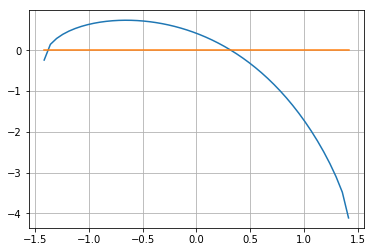

In [2]:
eps = 0.0000001
s=np.linspace(-math.sqrt(2)+eps,math.sqrt(2)-eps)
ylist = [f(x) for x in s]
zero=np.zeros(50)
p = plt.plot(s,ylist)
z = plt.plot(s, zero)
plt.grid(True)

Выбираем такие начальные приближения для двух наших корней

In [2]:
x0=0.32015
x1=-1.355
eps=[1e-5,1e-12]
c0=0.33
c2=-1.4
for e in eps:
    print('Epsilon = '+str(e)+':')
    print('Ньютон: x1 = %f, количество итераций = %d'%Newton(x0, f, diff_f,e,1000))
    print('Ньютон: x2 = %f, количество итераций = %d'%Newton(x1, f, diff_f,e,1000))
    print('Ложное положение: x1 = %f, количество итераций = %d'%false_position(x0, f,c0, e, 1000))
    print('Ложное положение: x2 = %f, количество итераций = %d'%false_position(x1, f,c2, e, 1000))  

Epsilon = 1e-05:
Ньютон: x1 = 0.320252, количество итераций = 1
Ньютон: x2 = -1.392205, количество итераций = 4
Ложное положение: x1 = 0.320252, количество итераций = 1
Ложное положение: x2 = -1.392205, количество итераций = 4
Epsilon = 1e-12:
Ньютон: x1 = 0.320252, количество итераций = 2
Ньютон: x2 = -1.392205, количество итераций = 5
Ложное положение: x1 = 0.320252, количество итераций = 4
Ложное положение: x2 = -1.392205, количество итераций = 11


**Вывод:**
при точности = 1е-5 количества итераций у обоих методов совпадают, а вот уже при точности = 1е-12 метод ложного положения-таки отстает и сходится медленнее, чем метод Ньютона.

**Задача 2.9.4 **

a)Локализовать корни уравнения f(x)=0. Уточнить их с точностью 10^(-7), используя метод Ньютона. 
Для поиска кратного корня и определения его кратности следует использовать модификацию метода Ньютона для случая кратного корня
с m=1,2,3. При любых ли начальных приближениях такой метод сходится? 

b) Рассмотреть уравнение f(x)+δ=0, где δ = 10^(-8). Найти корень кратности 1, используя метод Ньютона.
Применить для нахождения кратного корня соответствующую модификацию* метода Ньютона. 
Удается ли найти кратный корень? Если нет, то использовать метод Ньютона с комплексными начальными приближениями.
Сохранился ли кратный корень? Объяснить результаты

$f(x) = x^3 - 5.5x^2 + 9.5625x - 5.0625$

In [3]:
def f(x):
    return x*x*x-5.5*x*x+9.5625*x-5.0625
def diff_f(x):
    return 3*x*x-5.5*2*x+9.5625

In [11]:
def newton_modify(f, diff_f,x0,eps,m,maxiter):
    x=x0
    x_n=x-m*(f(x)/diff_f(x))
    xs=[]
    xs.append(x_n)
    i=1
    while abs(x_n-x)>eps:
        x=x_n
        x_n=x-m*(f(x)/diff_f(x))
        xs.append(x_n)
        i=i+1
        if i>maxiter:
            print('слишком много операций:')
            break
    return xs[-1],i

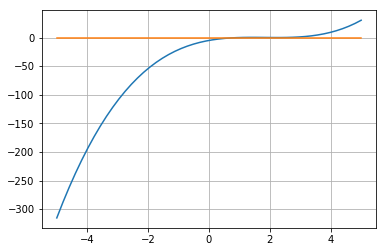

In [49]:
s=np.linspace(-5,5)
ylist = [f(x) for x in s]
zero=np.zeros(50)
p = plt.plot(s,ylist)
z = plt.plot(s, zero)
plt.grid(True)

Смотрим на график. Не совсем понятно, где тут какие корни, что из них кратно. Но! мы знаем, что если кратность=2, то производная =0 => касательная горизонтальна. Может, это как-то нам поможет, а пока возьмем такие начальные приближения.

In [12]:
eps=1e-7
x1=0.8
x2=1.9
maxiter=5000

In [51]:
print('Ньютон: x1 = %f, количество итераций = %d'%Newton(x1, f, diff_f,eps,1000))
print('Ньютон: x2 = %f, количество итераций = %d'%Newton(x2, f, diff_f,eps,1000))

Ньютон: x1 = 1.000000, количество итераций = 4
Ньютон: x2 = 2.250000, количество итераций = 21


Ньютон предлагает нам такие корни, и если верить Вольфраму, то это действительно так. Осталось разобраться с кратностями.

In [6]:
for i in range(3):
    x,k=newton_modify(f, diff_f,x1,eps,i+1,maxiter)
    print('Ньютон для кратных корней: x1 = ',x,' количество итераций =',k,' кратность =',i+1)

Ньютон для кратных корней: x1 =  1.0000000000000004  количество итераций = 5  кратность = 1
слишком много операций:
Ньютон для кратных корней: x1 =  1.0135610712180276  количество итераций = 1001  кратность = 2
Ньютон для кратных корней: x1 =  2.250000006454021  количество итераций = 29  кратность = 3


Первый корень уравнения = 1 с кратностью 1, так как из всех вариантов здесь самое меньшее количество итераций, похоже на правду!

In [7]:
for i in range(3):
    x,k=newton_modify(f, diff_f,x2,eps,i+1,maxiter)
    print('Ньютон для кратных корней: x2 = ',x,' количество итераций =',k,' кратность =',i+1)

Ньютон для кратных корней: x2 =  2.249999943826791  количество итераций = 22  кратность = 1
Ньютон для кратных корней: x2 =  2.2500000001902314  количество итераций = 7  кратность = 2
Ньютон для кратных корней: x2 =  2.24999995766847  количество итераций = 24  кратность = 3


Второй корень =2.25 кратности 2, и это радует! в данном случае модифицированный метод Ньютона сошелся быстрее всего.

Перейдем к пункту б.

In [13]:
def f2(x):
    return x**3-5.5*x*x+9.5625*x-5.0625+1e-8
def diff_f2(x):
    return 3*x*x-5.5*2*x+9.5625

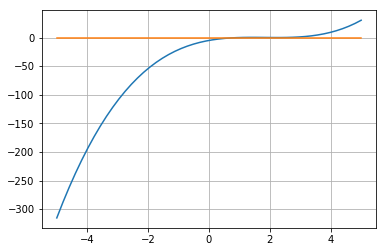

In [55]:
s=np.linspace(-5,5)
ylist = [f2(x) for x in s]
zero=np.zeros(50)
p = plt.plot(s,ylist)
z = plt.plot(s, zero)
plt.grid(True)

In [16]:
print('Ньютон: x1 = %f, количество итераций = %d'%Newton(x1, f2, diff_f2,eps,5000))
print('Ньютон: x2 = %f, количество итераций = %d'%Newton(x2, f2, diff_f2,eps,5000))

Ньютон: x1 = 1.000000, количество итераций = 4


ValueError: Error!!!

Один корень нашелся, со вторым уже метод Ньютона справиться не в состоянии и расходится.

In [19]:
for i in range(3):
    x,k=newton_modify(f2, diff_f2,x1,eps,i+1,maxiter)
    print('Ньютон для кратных корней: x1 = ',x,' количество итераций =',k,' кратность =',i+1)

Ньютон для кратных корней: x1 =  0.9999999936000004  количество итераций = 5  кратность = 1
слишком много операций:
Ньютон для кратных корней: x1 =  1.0061767221319495  количество итераций = 5001  кратность = 2
слишком много операций:
Ньютон для кратных корней: x1 =  2.249845109419729  количество итераций = 5001  кратность = 3


In [20]:
for i in range(3):
    x,k=newton_modify(f2, diff_f2,x2,eps,i+1,maxiter)
    print('Ньютон для кратных корней: x2 = ',x,' количество итераций =',k,' кратность =',i+1)

слишком много операций:
Ньютон для кратных корней: x2 =  2.2500065031806864  количество итераций = 5001  кратность = 1
слишком много операций:
Ньютон для кратных корней: x2 =  2.2500769010504045  количество итераций = 5001  кратность = 2
слишком много операций:
Ньютон для кратных корней: x2 =  2.2501549481266196  количество итераций = 5001  кратность = 3


Второй корень все никак не желает находиться, метод Ньютона расходится и все тут! 
Я эксперементировала с различным числом итераций и начальными приближениями, все бесполезно!
Попробуем комплексные начальные приближения

In [21]:
x2=complex(2,1)
for i in range(3):
    x,k=newton_modify(f2, diff_f2,x2,eps,i+1,maxiter)
    print('Ньютон для кратных корней: x2 = ',x,' количество итераций =',k,' кратность =',i+1)

Ньютон для кратных корней: x2 =  (2.250000003200025+8.944270483030054e-05j)  количество итераций = 18  кратность = 1
слишком много операций:
Ньютон для кратных корней: x2 =  (2.2499041414365455-1.2630832665467355e-07j)  количество итераций = 5001  кратность = 2
слишком много операций:
Ньютон для кратных корней: x2 =  (2.2498451094591854+3.569e-320j)  количество итераций = 5001  кратность = 3


In [24]:
x,k=Newton(x2, f2, diff_f2,eps,5000)
print('Ньютон: x2 = ',x,' количество итераций =',k)

Ньютон: x2 =  (2.250000003200025+8.944270483030054e-05j)  количество итераций = 17


А вот тут уже другое дело. 
Нашелся один комплексный корень, с ним в паре идет и сопряженный, который тоже является корнем уравнения